#  Predicting House Pricing Using Advanced Regression

In this project, we will create a regression model using the house prices dataset obtained from Kaggle.com. Our dataset is divided into two parts: train and test. We will train our model using the train dataset and make predictions about house price on the test dataset, which we will then submit to Kaggle.com.

<img src="https://miro.medium.com/v2/resize:fit:1024/1*Juv1bpp5--0Fl8cA4EmTPw.jpeg" >
<p><a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview">Click here to view dataset</a></p>

### Data Dictionary

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: $Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale


### Import Datasets

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

We will combine the test and train dataset to process together.

In [7]:
df_train['train'] = 1
df_test['train'] = 0
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageFinish      159
GarageYrBlt       159
GarageQual        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrArea         23
MSZoning            4
Functional          2
BsmtFullBath        2
Utilities           2
BsmtHalfBath        2
BsmtFinSF1          1
GarageCars          1
GarageArea          1
Electrical          1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
BsmtUnfSF           1
SaleType            1
KitchenQual         1
BsmtFinSF2          1
Fireplaces          0
TotRmsAbvGrd        0
Id                  0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

### Feature Engineering

We will describe wich columns how much has empty values.

In [10]:
empty_data=df.isnull().sum()
sum_data=len(df)
pct=(empty_data/sum_data)*100
empty=pd.DataFrame({'empty_data':empty_data,'pct':pct})

In [11]:
empty.sort_values(by='pct',ascending=False)

,empty_data,pct
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageFinish,159,5.447071


Let's fill the empty rows. First we will delete rows with more than 80% empty data.Then fill the other.

In [12]:
df=df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [13]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [14]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [15]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageQual        159
GarageCond        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
BsmtFullBath        2
Utilities           2
Functional          2
BsmtHalfBath        2
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
KitchenQual         1
Electrical          1
Exterior2nd         1
Exterior1st         1
GarageArea          1
SaleType            1
GarageCars          1
MoSold              0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
SaleCondition       0
TotRmsAbvGrd        0
YrSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
Fireplaces

In [16]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

<Axes: xlabel='FireplaceQu', ylabel='count'>

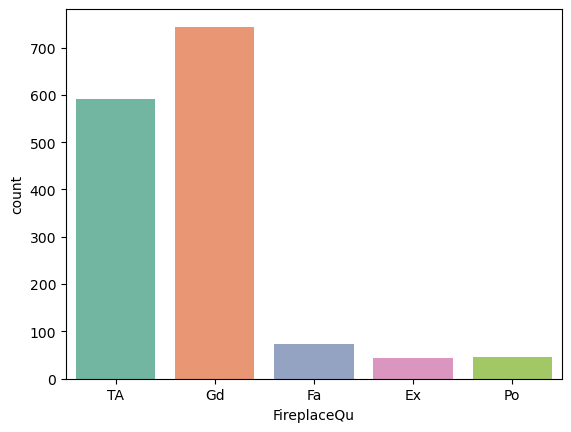

In [17]:
sns.countplot(x='FireplaceQu', data=df,palette='Set2')

In [18]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [19]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
90.0      46
78.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
79.0      28
100.0     28
82.0      28
52.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
55.0      24
53.0      24
43.0      23
88.0      22
67.0      22
69.0      20
35.0      19
71.0      19
56.0      19
44.0      19
84.0      18
81.0      18
58.0      17
61.0      17
48.0      16
40.0      16
34.0      16
86.0      15
92.0      15
95.0      15
110.0     15
77.0      15
41.0      14
120.0     14
91.0      14
96.0      14
83.0      13
93.0      13
94.0      12
42.0      12
105.0     12
98.0      12
87.0      11
107.0     11
30.0      11
54.0      10
45.0      10
89.0      10
102.0     10
47.0       8
36.0       8
32.0       8
37.0       7
39.0       6
99.0       6
103.0      6
108.0      6
114.0      5
104.0      5


In [20]:
df['LotFrontage'].mean(), df['LotFrontage'].median(), df['LotFrontage'].mode()

(69.30579531442663,
 68.0,
 0    60.0
 Name: LotFrontage, dtype: float64)

<Axes: ylabel='LotFrontage'>

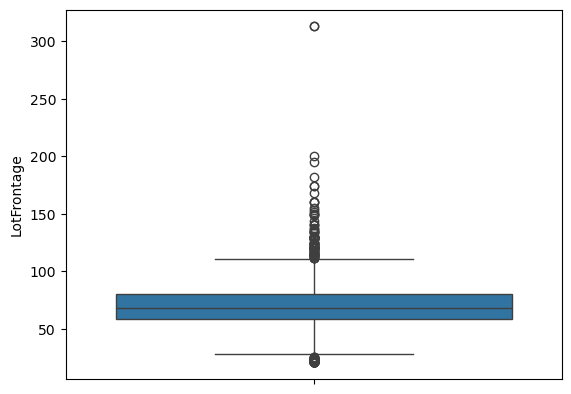

In [21]:
sns.boxplot(df['LotFrontage'])

In [22]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [23]:
df['GarageCond'].value_counts()

GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64

<Axes: xlabel='GarageFinish', ylabel='count'>

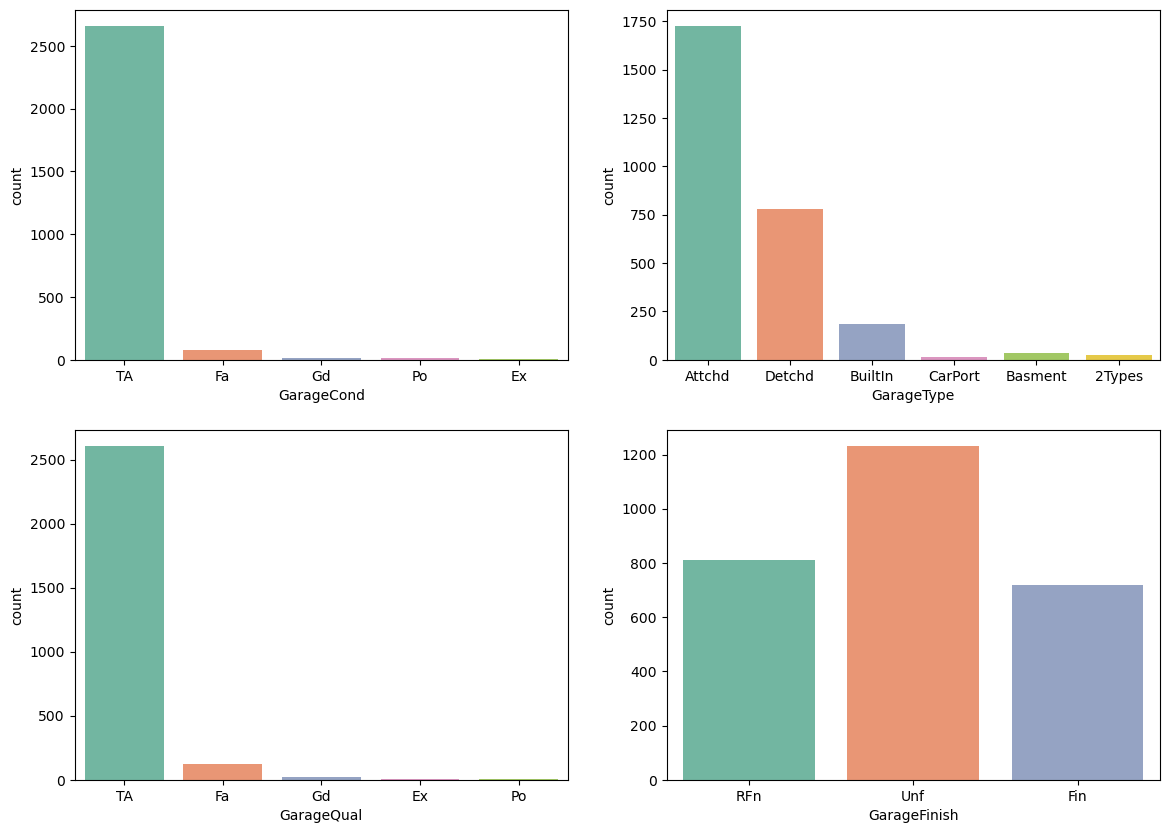

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(ax=axes[0,0],x=df['GarageCond'],palette='Set2')
sns.countplot(ax=axes[0,1],x=df['GarageType'],palette='Set2')
sns.countplot(ax=axes[1,0],x=df['GarageQual'],palette='Set2')
sns.countplot(ax=axes[1,1],x=df['GarageFinish'],palette='Set2')

In [25]:
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')

In [26]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
GarageYrBlt       159
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
BsmtFullBath        2
Functional          2
BsmtHalfBath        2
Utilities           2
BsmtFinSF1          1
GarageCars          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
KitchenQual         1
Electrical          1
Exterior1st         1
Exterior2nd         1
SaleType            1
GarageArea          1
GarageFinish        0
PoolArea            0
FullBath            0
HalfBath            0
BedroomAbvGr        0
SaleCondition       0
KitchenAbvGr        0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageCond          0
GarageQual          0
Id        

In [27]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)

In [28]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
BsmtHalfBath        2
Functional          2
BsmtFullBath        2
Utilities           2
Exterior1st         1
BsmtFinSF1          1
BsmtUnfSF           1
TotalBsmtSF         1
KitchenQual         1
Electrical          1
BsmtFinSF2          1
Exterior2nd         1
SaleType            1
GarageArea          0
ScreenPorch         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
SaleCondition       0
KitchenAbvGr        0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
3SsnPorch           0
GarageCars          0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBlt         0
GarageCond          0
GarageQual          0
GarageFinish        0
Id        

<Axes: xlabel='BsmtFinType2', ylabel='count'>

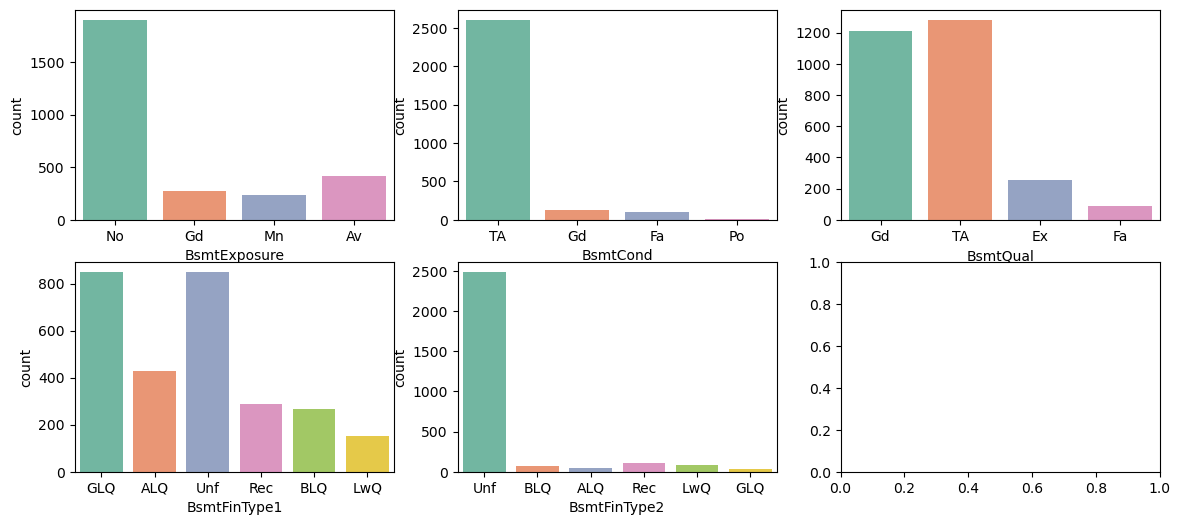

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
sns.countplot(ax=axes[0,0],x=df['BsmtExposure'],palette='Set2')
sns.countplot(ax=axes[0,1],x=df['BsmtCond'],palette='Set2')
sns.countplot(ax=axes[0,2],x=df['BsmtQual'],palette='Set2')
sns.countplot(ax=axes[1,0],x=df['BsmtFinType1'],palette='Set2')
sns.countplot(ax=axes[1,1],x=df['BsmtFinType2'],palette='Set2')

In [30]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

In [31]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
MSZoning            4
Functional          2
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
BsmtFinSF2          1
BsmtUnfSF           1
Exterior1st         1
KitchenQual         1
BsmtFinSF1          1
Exterior2nd         1
TotalBsmtSF         1
SaleType            1
Electrical          1
GarageType          0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
FullBath            0
TotRmsAbvGrd        0
Fireplaces          0
FireplaceQu         0
Id                  0
GarageFinish        0
GarageYrBlt         0
LowQualFinSF        0
SaleCondition       0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCond          0
GarageQual          0
GarageArea          0
GarageCars          0
GrLivArea           0
HeatingQC           0
2ndFlrSF            0
Neighborho

In [32]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [33]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Exterior1st         1
SaleType            1
Electrical          1
KitchenQual         1
KitchenAbvGr        0
GarageType          0
FireplaceQu         0
Fireplaces          0
TotRmsAbvGrd        0
Id                  0
BedroomAbvGr        0
GarageYrBlt         0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
HalfBath            0
GarageCars          0
GarageFinish        0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
1stFlrSF            0
HeatingQC           0
CentralAir          0
MSSubClass          0
YearBuilt           0
OverallCon

<Axes: xlabel='MSZoning', ylabel='count'>

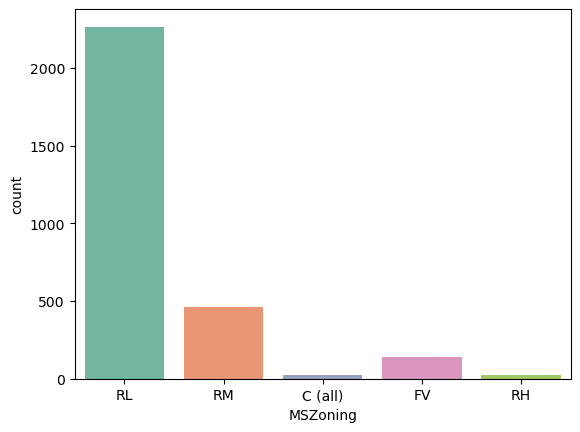

In [34]:
sns.countplot(x='MSZoning', data=df,palette='Set2')

In [35]:
df['MSZoning']=df['MSZoning'].fillna('RL')

<Axes: xlabel='Utilities', ylabel='count'>

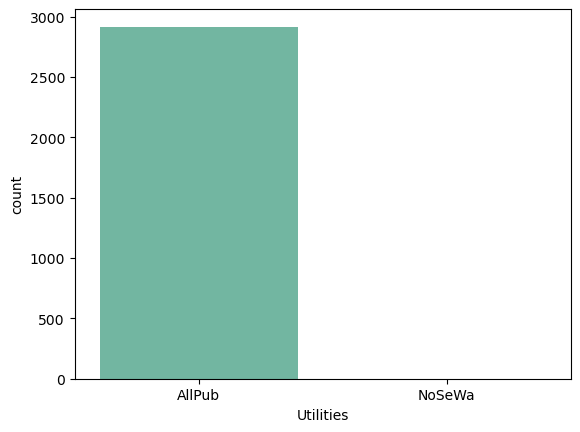

In [36]:
sns.countplot(x='Utilities', data=df,palette='Set2')

In [37]:
df['Utilities']=df['Utilities'].fillna('AllPub')

<Axes: xlabel='Functional', ylabel='count'>

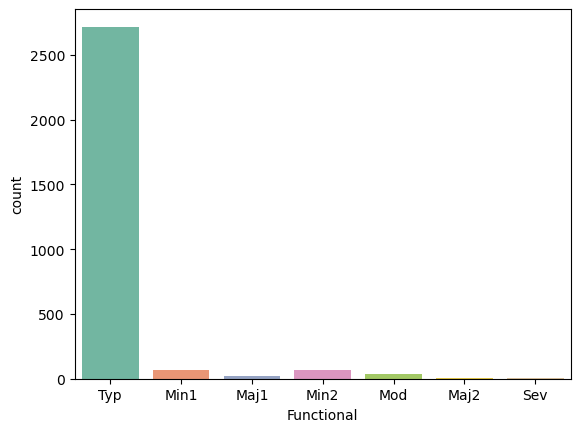

In [38]:
sns.countplot(x='Functional', data=df,palette='Set2')

In [39]:
df['Functional']=df['Functional'].fillna('Typ')

<Axes: xlabel='Electrical', ylabel='count'>

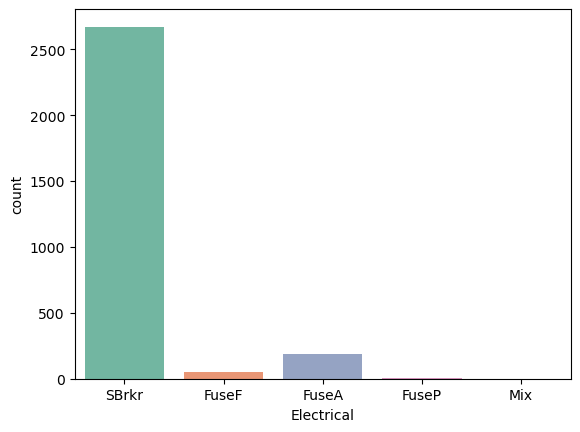

In [40]:
sns.countplot(x='Electrical', data=df,palette='Set2')

In [41]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

<Axes: xlabel='KitchenQual', ylabel='count'>

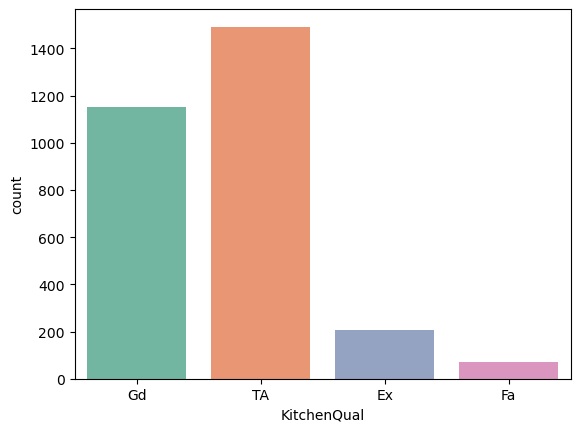

In [42]:
sns.countplot(x='KitchenQual', data=df,palette='Set2')

In [43]:
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

<Axes: xlabel='Exterior1st', ylabel='count'>

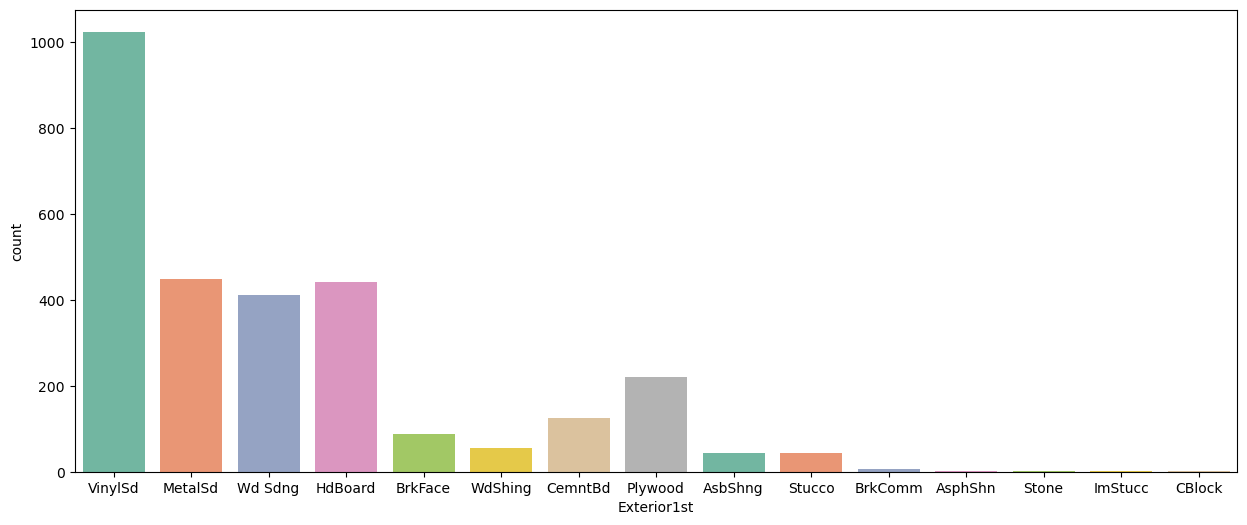

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x='Exterior1st', data=df,palette='Set2')

In [45]:
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

<Axes: xlabel='Exterior2nd', ylabel='count'>

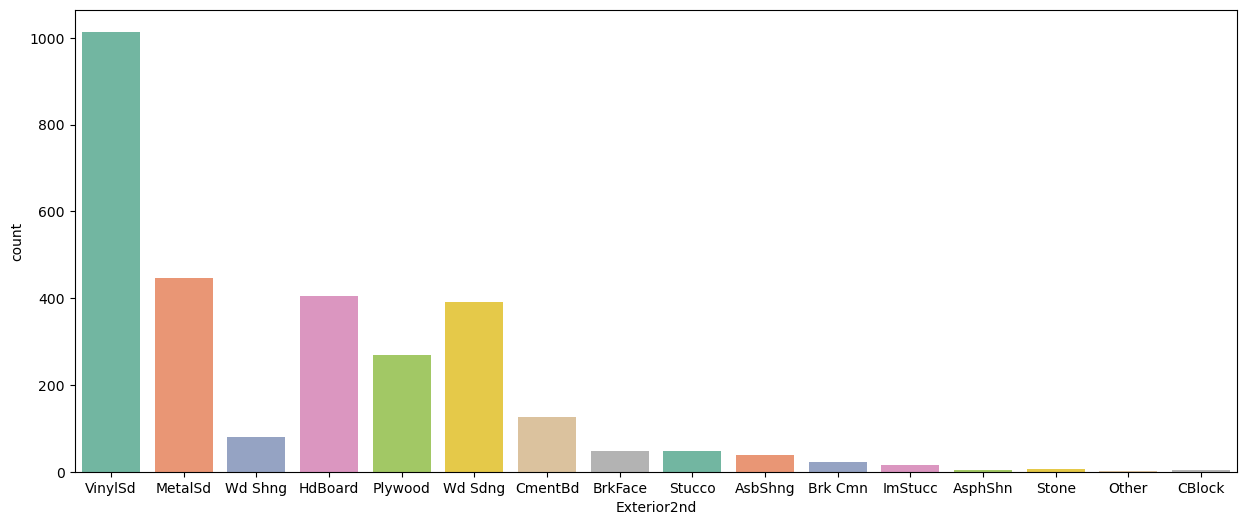

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(x='Exterior2nd', data=df,palette='Set2')

In [47]:
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

<Axes: xlabel='SaleType', ylabel='count'>

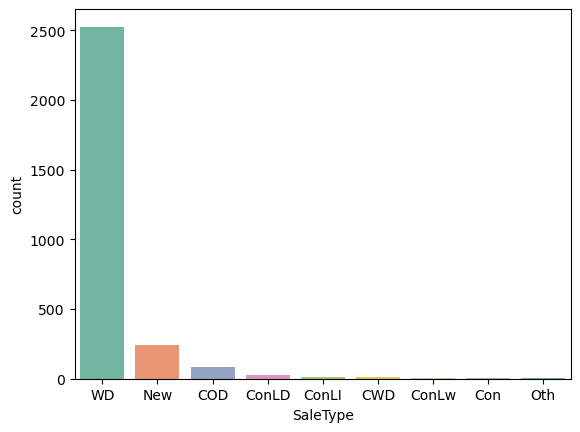

In [48]:
sns.countplot(x='SaleType', data=df,palette='Set2')

In [49]:
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])

In [50]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
Id                  0
HalfBath            0
FireplaceQu         0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
FullBath            0
GarageYrBlt         0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
Electrical          0
GarageType          0
GarageFinish        0
MSSubClass          0
GarageCars          0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCond          0
GarageQual          0
GarageArea          0
CentralAir          0
HeatingQC           0
Heating             0
LandSlope           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType  

<Axes: >

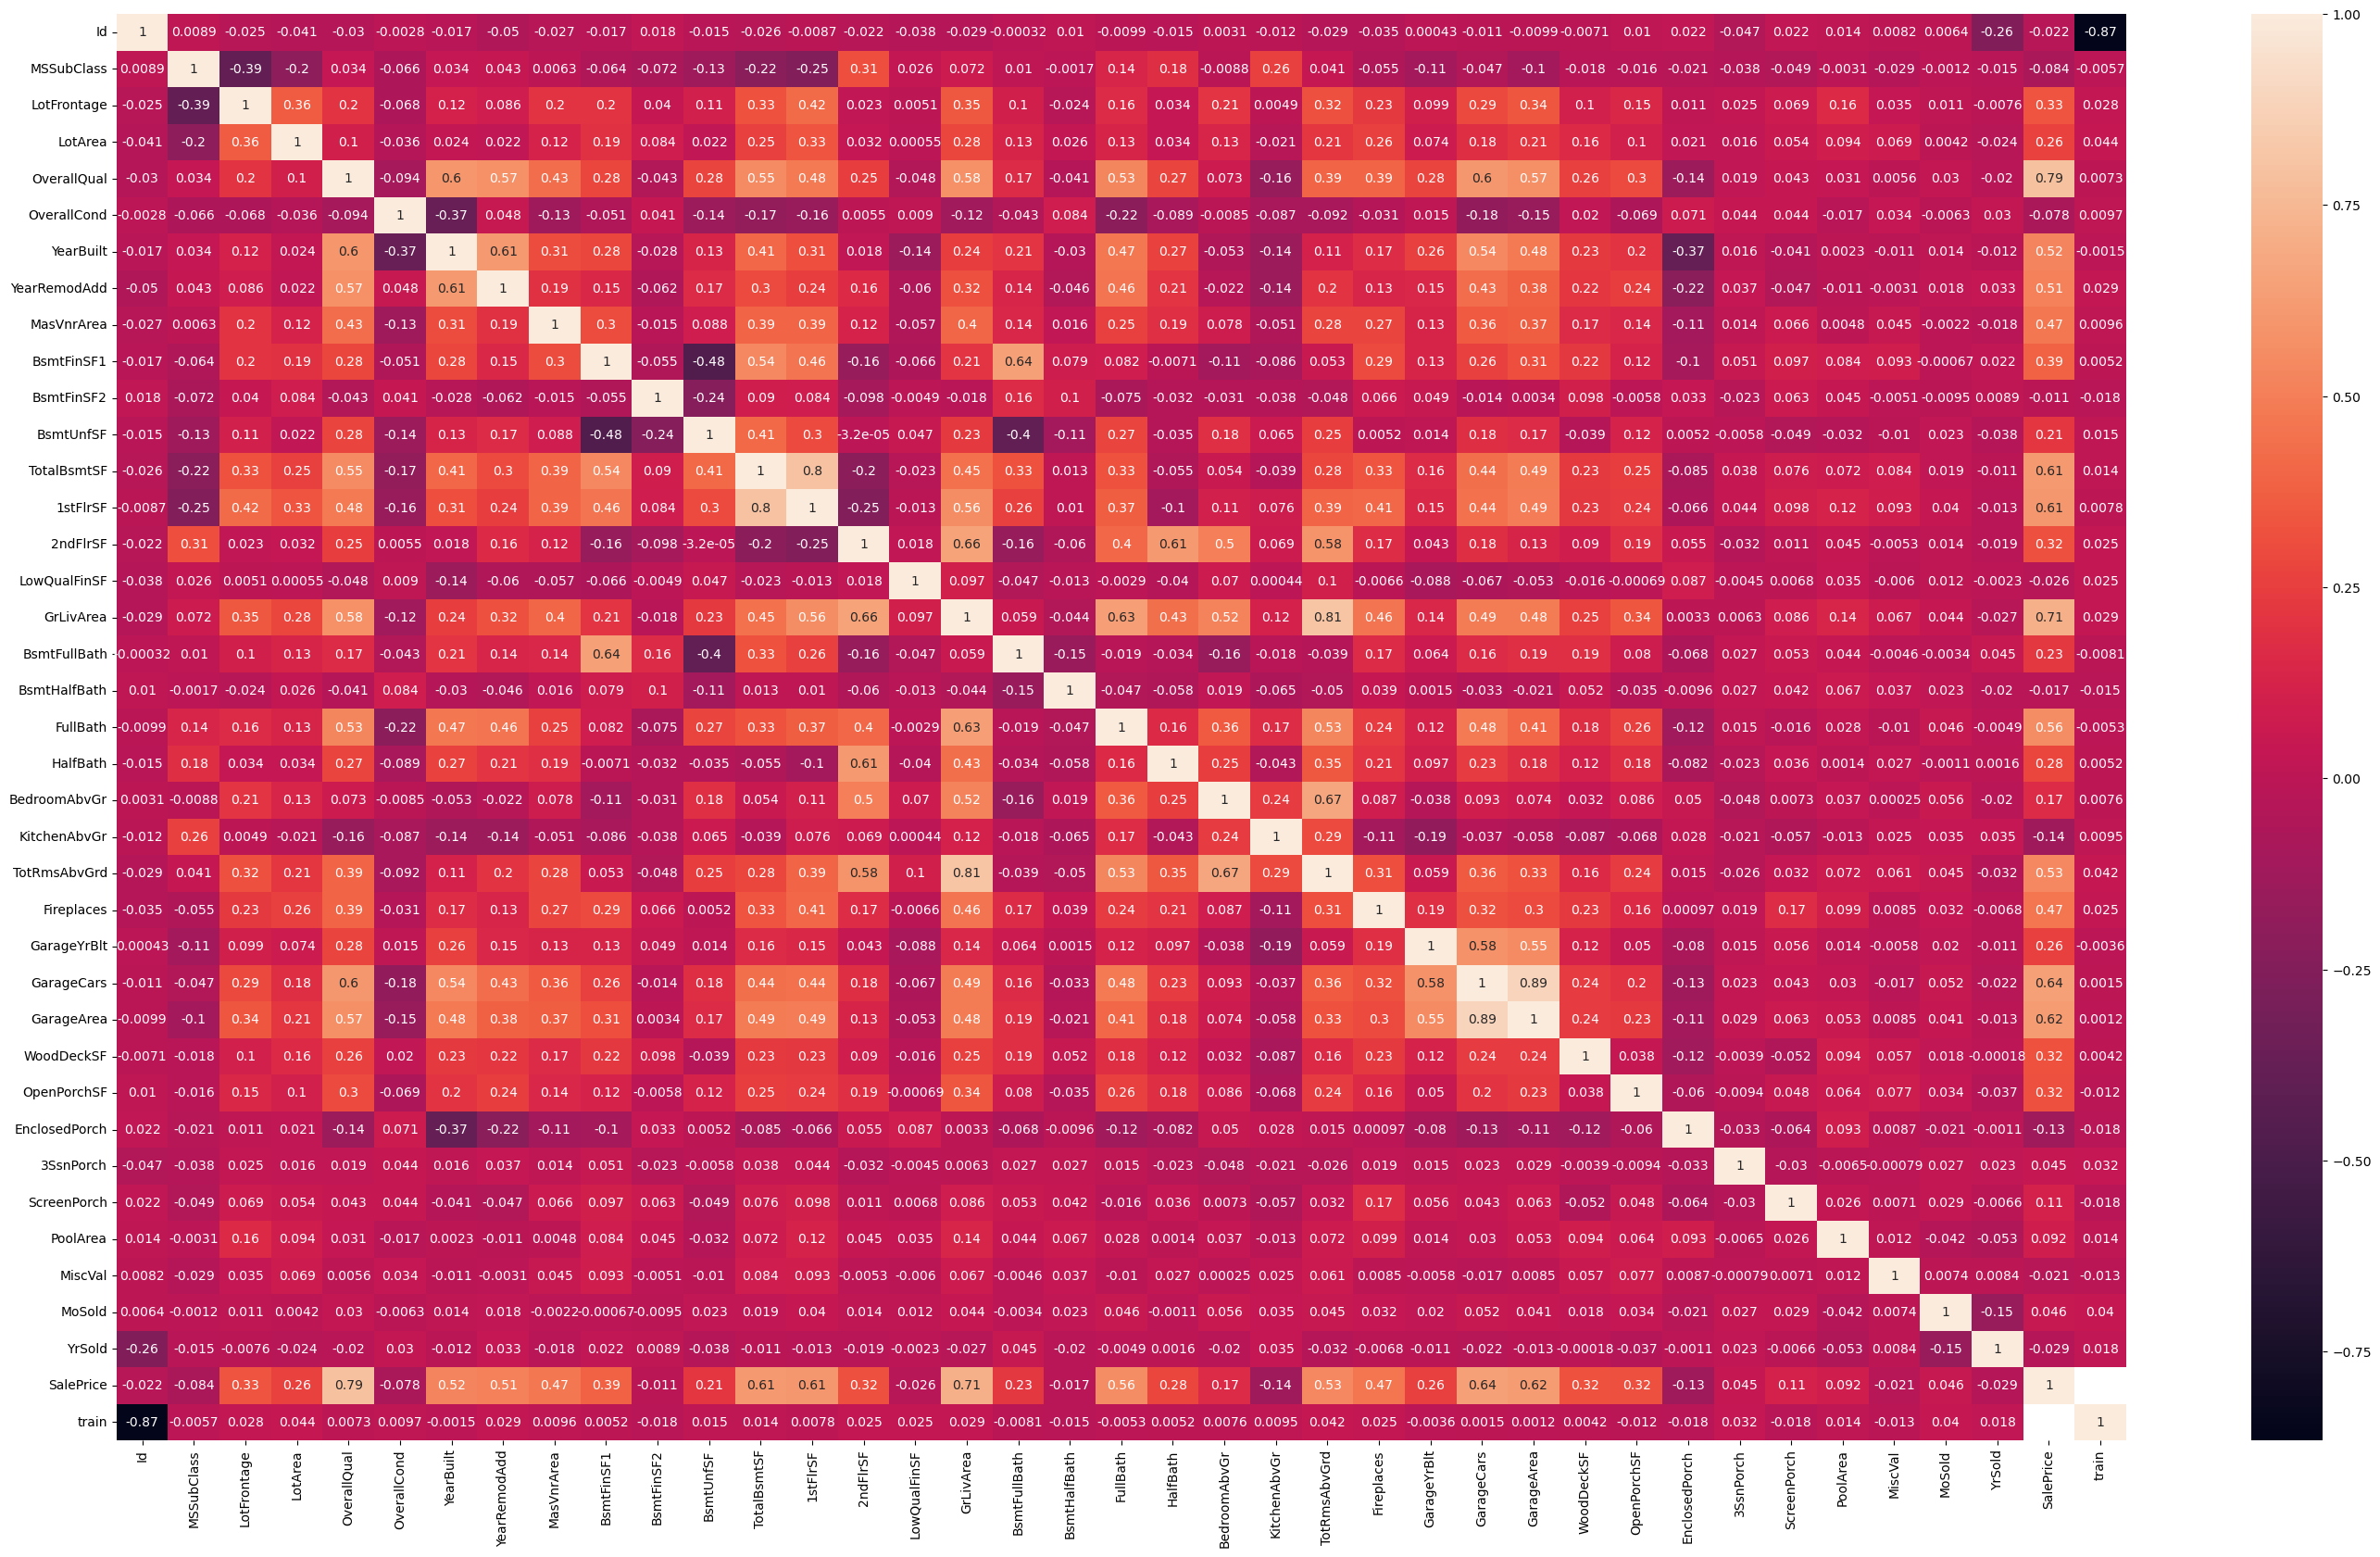

In [51]:
plt.figure(figsize=(35,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [52]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0,1


To train our model, we will convert the data in the object datatype to numeric data.

In [53]:
df=pd.get_dummies(df,drop_first=True)

In [54]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,54

In [55]:
df['train'].value_counts()

train
1    1460
0    1459
Name: count, dtype: int64

Let's seperate train and test dataset

In [56]:
df_train = df[df['train'] == 1]
df_test = df[df['train'] == 0]

### Regression

Let's determine our x and y values

In [57]:
x=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

In [58]:
x.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,train,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0

We will use algo test algorithm and apply various regression library to the data and we will find which library give us the best score.

In [59]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #I define all models
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #I create a dataframe to tabulate the error and accuracy rates
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #I place my accuracy and error rates in the table named result
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #sorts and returns the result table I created according to the accuracy rate (r2_score)
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [60]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.995099e-01,2.776314e+04,1.781973e+04
XGBRegressor,8.955218e-01,2.830868e+04,1.722017e+04
Ridge,8.813109e-01,3.017257e+04,1.986163e+04
ElasticNet,8.374847e-01,3.530645e+04,2.035734e+04
KNeighborsRegressor,8.293155e-01,3.618295e+04,2.549342e+04
Decision Tree,8.000508e-01,3.916217e+04,2.569598e+04
Extra Tree,7.343972e-01,4.513602e+04,3.003819e+04
AdaBoost,6.877288e-01,4.894100e+04,2.970585e+04
mlp_regressor,6.666850e-01,5.056318e+04,3.133950e+04
Lasso,6.619026e-01,5.092462e+04,2.035490e+04


We find that XGBRegressor give us the best score.

In [61]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [62]:
xgb=XGBRegressor()

In [63]:
xgb_model=xgb.fit(x_train,y_train)

In [64]:
y_pred=xgb_model.predict(x_test)

In [65]:
r2_score(y_test,y_pred)

0.8955218310114943

<Axes: ylabel='SalePrice'>

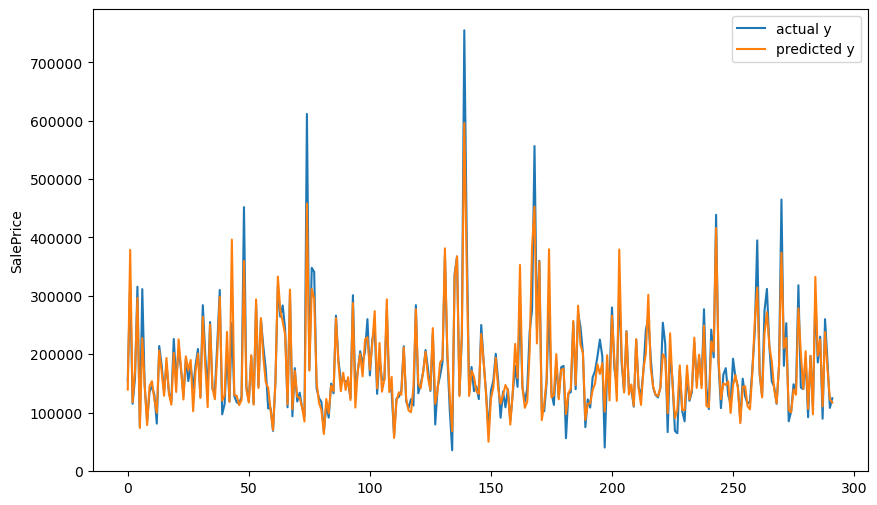

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)),y=y_test, label="actual y")
sns.lineplot(x=range(len(y_test)),y=y_pred, label="predicted y")

### Feature Importance

Now, we will show which one is the best.

In [67]:
xgb.feature_importances_

array([4.72439307e-04, 1.63391000e-03, 2.22712173e-03, 3.32183228e-03,
       3.29769343e-01, 4.87803156e-03, 7.54390983e-03, 3.44934734e-03,
       1.54699595e-03, 1.02408677e-02, 1.24167802e-03, 6.41167746e-04,
       1.29365241e-02, 1.46894967e-02, 1.47732692e-02, 1.72298442e-05,
       4.41826135e-02, 2.09315866e-03, 1.82043834e-04, 2.58173153e-04,
       3.90755944e-03, 2.77969730e-03, 1.28837628e-02, 1.39942742e-03,
       9.99480020e-03, 8.68391991e-03, 1.22537792e-01, 4.98451153e-03,
       1.31552038e-03, 7.13593652e-03, 1.03366259e-03, 1.20599499e-04,
       4.42380272e-03, 6.94738561e-03, 5.45961200e-04, 4.83660348e-04,
       4.37611074e-04, 0.00000000e+00, 9.46074957e-04, 0.00000000e+00,
       4.56136232e-03, 1.10734785e-02, 0.00000000e+00, 1.05632535e-04,
       7.27097178e-03, 7.03157065e-03, 1.09133543e-03, 9.04640037e-05,
       2.33491883e-03, 0.00000000e+00, 1.58077513e-03, 7.30838510e-04,
       2.35861680e-03, 5.16613014e-04, 0.00000000e+00, 0.00000000e+00,
      

In [68]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':xgb.feature_importances_})

In [69]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

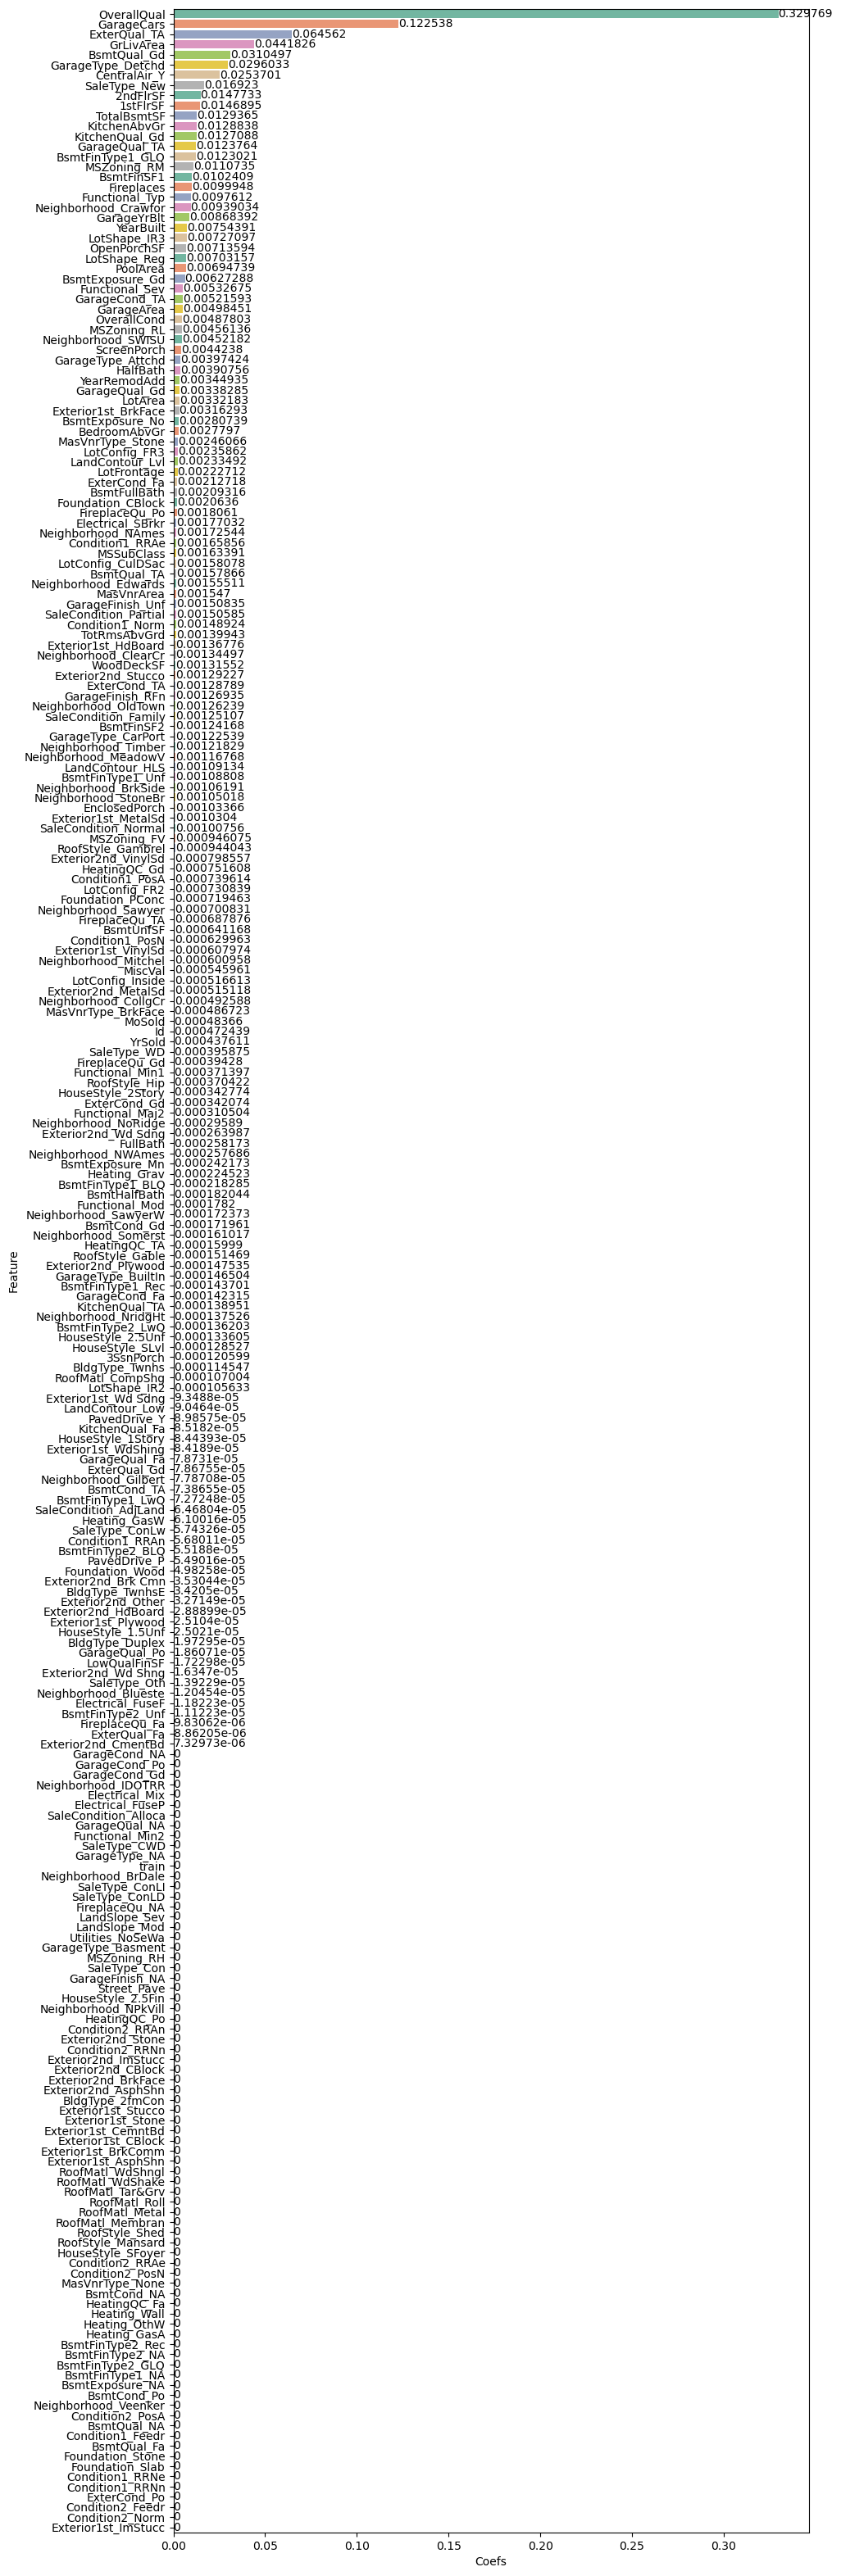

In [70]:
plt.figure(figsize=(10, 40))
ax = sns.barplot(y='Feature', x='Coefs', data=feature_importance, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

### Predicting df_test SalePrice

In [71]:
df_test=df_test.drop('SalePrice',axis=1)

In [72]:
y_pred_test=xgb_model.predict(df_test)

In [73]:
y_pred_test

array([128660.93, 150279.42, 188120.02, ..., 167746.69, 111757.31,
       217303.67], dtype=float32)

In [74]:
df_test['SalePrice'] = y_pred_test

In [75]:
df_test[['Id', 'SalePrice']].head()  

,Id,SalePrice
1460,1461,128660.929688
1461,1462,150279.421875
1462,1463,188120.015625
1463,1464,191615.890625
1464,1465,198107.875000


In [76]:
df_test[['Id', 'SalePrice']].to_csv('house_price_predict1.csv', index=False)

### Conclusion

"We had a dataset that included the features of the houses along with their prices. Since it was a Kaggle competition, the data was provided in two parts: train and test. We read both datasets using the pandas library and combined them into a single dataframe. Then, we filled the missing data with the most appropriate values. While filling in the missing data, we used the seaborn and matplotlib libraries to visualize our data and made our decisions accordingly. Afterward, we reverted the data back to its original form by splitting it into train and test sets. We split the train dataset into 80% train and 20% test. We used 14 different regression libraries to create 14 different regression models. The most successful model was created using XGBRegressor, achieving a 90% R2 score. We determined the feature importance, which supported the results from our correlation analysis. With the model we created, we predicted the house prices in the test dataset. We exported our prediction data into a .csv file and uploaded it to Kaggle.com. With our predictions, we achieved a Score of 0.15545.